In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.

This lab starts with Part III of the previous one!



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



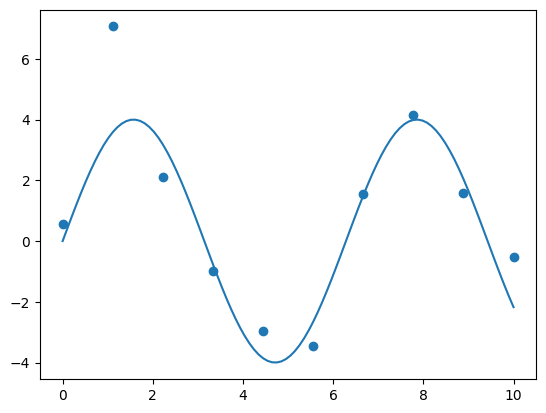

In [2]:
# your code here

# Gerando o x e o y sem ruído
x = np.linspace(0, 10, 10)
y = 4*np.sin(x)
# Gerando o ruído e o y com ruído
noise = np.random.normal(size = 10)
y_noise = y + noise

# Valores para desenhar a curva
x_sin = np.linspace(0, 10, 100)
y_sin = 4*np.sin(x_sin)

# Plotando o gráfico
plt.scatter(x, y_noise)
plt.plot(x_sin, y_sin)
plt.show()

In [3]:
# Função para calcular a matriz phi com base na função de base polinomial
def apply_polinomial_basis_function(data, degree):
    # Número de dados
    n_of_datapoints = data.shape[0]
    # Inicializando a matriz phi
    phi = np.zeros((n_of_datapoints, degree + 1))

    # Para cada potência...
    for degree in range(degree + 1):
        # Salva na coluna correspondente os dados elevados à potência
        phi[:, degree] = data ** degree

    return phi

In [4]:
# Calculando as matrizes phi para cada potência
phi_2 = apply_polinomial_basis_function(x, 2)
phi_4 = apply_polinomial_basis_function(x, 4)
phi_9 = apply_polinomial_basis_function(x, 9)

In [5]:
# Função para aprender os parâmetros com base na equação normal
def linear_regression_PI(X, y):
    # Calculando a pseudo-inversa da matriz de dados (já com a coluna referente ao bias)
    pseudo_inverse = np.linalg.inv(X.T @ X) @ X.T
    # Encontrando o vetor w
    w = pseudo_inverse @ y

    return w

In [6]:
# Aprendendo os parâmetros para cada potência
w_2 = linear_regression_PI(phi_2, y_noise)
w_4 = linear_regression_PI(phi_4, y_noise)
w_9 = linear_regression_PI(phi_9, y_noise)

In [7]:
# Fazendo as predições para cada parâmetro
prediction_2 = phi_2 @ w_2
prediction_4 = phi_4 @ w_4
prediction_9 = phi_9 @ w_9

In [8]:
# Função para plotar os gráficos com as predições e os valores reais
def plot_data_prediction(data, true_values, prediction, title):
    plt.plot(data, prediction, label = "Prediction")
    plt.scatter(data, true_values, label = "Data")
    plt.title(title)
    plt.legend()
    plt.show()

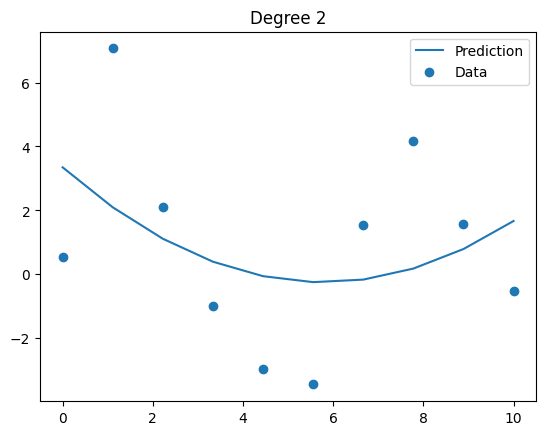

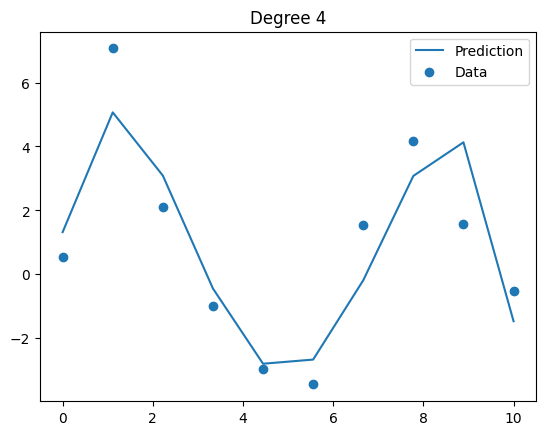

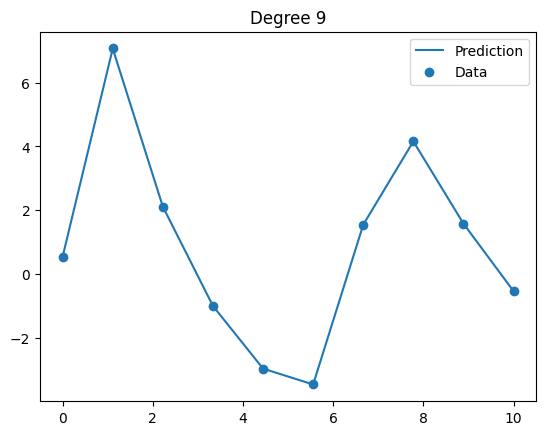

In [9]:
# Plotando os gráficos de cada potência
plot_data_prediction(x, y_noise, prediction_2, "Degree 2")
plot_data_prediction(x, y_noise, prediction_4, "Degree 4")
plot_data_prediction(x, y_noise, prediction_9, "Degree 9")

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

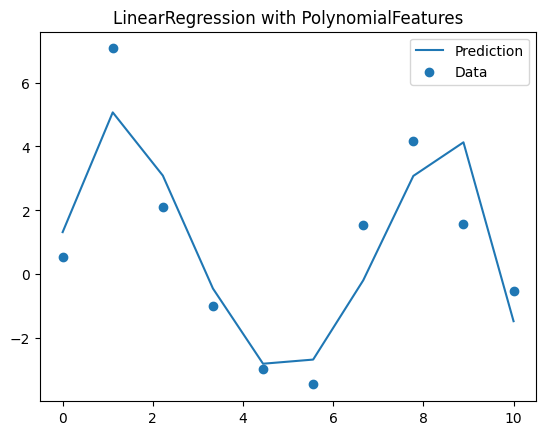

Coefficients:  [ 0.          7.5224152  -4.53993982  0.76798621 -0.03920033]


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Redimensionando o dado
data = x.reshape(-1, 1)

# Criando uma instância do PolynomialFeatures
poly_features = PolynomialFeatures(degree = 4)

# Transformando o dado original em características polinomiais
data_poly = poly_features.fit_transform(data)

# Criando uma instância do modelo de regressão linear
model = LinearRegression()

# Ajustando o modelo aos dados com as características polinomiais
model.fit(data_poly, y_noise)

# Prevendo usando o modelo ajustado
predictions = model.predict(data_poly)

# Plotando o dado com as previsões
plot_data_prediction(data, y_noise, predictions, "LinearRegression with PolynomialFeatures")

print("Coefficients: ", model.coef_)

### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [48]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [110]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [111]:
# your code goes here:

# Adicionando a coluna do bias
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Dividindo os dados em conjunto de (treino + validação) e teste
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1)
# Dividindo o conjunto de (treino + validação) em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 1/9)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [112]:
def ridge_regression(X, y, lbda):
    # your code goes here:

    # Número de colunas do dado
    n_of_features = X.shape[1]
    # Matriz de penalidade
    penalty = lbda * np.eye(n_of_features)
    penalty[0][0] = 0
    # Calculando os parâmetros
    w = np.linalg.inv(penalty + X.T @ X) @ X.T @ y

    return w

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [113]:
# your code goes here:

# Função para calcular o RMSE
def rmse(predictions, y):
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

# Array com os lambdas
lbdas = np.linspace(0, 2, 20)
# Array com os RMSEs do conjunto de validação
rmses_val = np.array([])

# Para cada valor de lambda...
for lbda in lbdas:
    # Calcula os parâmetros
    w = ridge_regression(X_train, y_train, lbda)
    # Prevê usando o conjunto de validação
    predictions = X_val @ w
    # Calcula o RMSE
    current_rmse = rmse(predictions, y_val)
    # Adiciona ao array de RMSEs
    rmses_val = np.append(rmses_val, current_rmse)

# Pegando o lambda com menor RMSE
best_lbda = lbdas[np.argmin(rmses_val)]

print("Melhor valor para lambda: ", best_lbda)

Melhor valor para lambda:  1.5789473684210527


Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

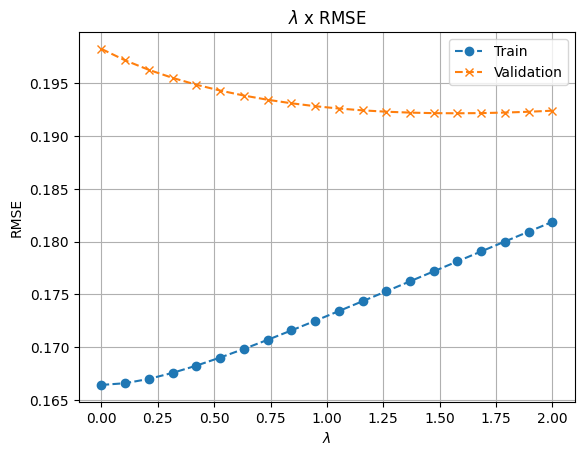

In [114]:
# your code goes here:

# Array com os RMSEs do conjunto de treino
rmses_train = np.array([])

# Para cada lambda...
for lbda in lbdas:
    # Calcula os parâmetros com base no conjunto de treino
    w = ridge_regression(X_train, y_train, lbda)
    # Prevê usando o conjunto de treino
    predictions = X_train @ w
    # Calcula o RMSE
    current_rmse = rmse(predictions, y_train)
    # Adiciona ao array de RMSEs
    rmses_train = np.append(rmses_train, current_rmse)

# Plotando o gráfico
plt.plot(lbdas, rmses_train, label = "Train", marker = "o", linestyle = "--")
plt.plot(lbdas, rmses_val, label = "Validation", marker = "x", linestyle = "--")
plt.title(r"$\lambda$ x RMSE")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"RMSE")
plt.legend()
plt.grid(True)

plt.show()

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [116]:
# your code goes here:

# Calculando os parâmetros finais, agora com o conjunto de treino unido ao de validação e com o melhor lambda encontrado
best_w = ridge_regression(X_train_and_val, y_train_and_val, best_lbda)
# Prevendo usando o conjunto de testes
predictions = X_test @ best_w
# Calculando o RMSE
rmse_test = rmse(predictions, y_test)

rmse_test

0.21085867674725847

# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [117]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
alpha_value = 0.0001
lasso_regression = Lasso(alpha=alpha_value).fit(X_train, y_train)
y_predict_lasso_reg = lasso_regression.predict(X_val)

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+00, tolerance: 6.081e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

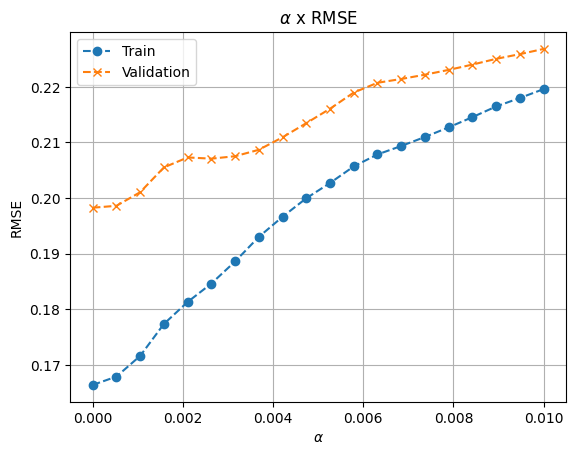

In [118]:
# your code goes here:

# Arrays com os valores de alpha e com os RMSEs de validação e de treino
alphas = np.linspace(0, 0.01, 20)
rmses_val = np.array([])
rmses_train = np.array([])

# Para cada alpha...
for alpha_value in alphas:
    # Calcula os parâmetros da regressão
    lasso_regression = Lasso(alpha = alpha_value).fit(X_train, y_train)

    # Faz previsões no conjunto de validação, calcula o RMSE e o armazena
    y_predict_lasso_reg_val = lasso_regression.predict(X_val)
    current_rmse_val = rmse(y_predict_lasso_reg_val, y_val)
    rmses_val = np.append(rmses_val, current_rmse_val)

    # Faz previsões no conjunto de treino, calcula o RMSE e o armazena
    y_predict_lasso_reg_train = lasso_regression.predict(X_train)
    current_rmse_train = rmse(y_predict_lasso_reg_train, y_train)
    rmses_train = np.append(rmses_train, current_rmse_train)

# Plotando o gráfico
plt.plot(alphas, rmses_train, label = "Train", marker = "o", linestyle = "--")
plt.plot(alphas, rmses_val, label = "Validation", marker = "x", linestyle = "--")
plt.title(r"$\alpha$ x RMSE")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"RMSE")
plt.legend()
plt.grid(True)

plt.show()

In [119]:
# Encontrando o melhor alpha
best_alpha = alphas[np.argmin(rmses_val)]

# Calculando os parâmetros e as predições no conjunto de teste com esse alpha
lasso_regression = Lasso(alpha=best_alpha).fit(X_train_and_val, y_train_and_val)
y_predict_lasso_reg_test = lasso_regression.predict(X_test)

# Calculando o RMSE
rmse_test = rmse(y_predict_lasso_reg_test, y_test)

rmse_test

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.563e+00, tolerance: 6.798e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

0.20474191824861063

# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [120]:
# your code goes here:

# Criando a instância da ElasticNet
elastic_net = ElasticNet(alpha = best_lbda, l1_ratio = best_alpha)
# Aprendendo os parâmetros com base nos conjuntos unificados de treino e validação
elastic_net.fit(X_train_and_val, y_train_and_val)
# Fazendo previsões do conjunto de teste
y_predict_elastic_net = elastic_net.predict(X_test)
# Calculando o RMSE
rmse_elastic_net = rmse(y_predict_elastic_net, y_test)

rmse_elastic_net

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+01, tolerance: 6.798e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.3688840864536086